In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import missingno as msno 
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# Customer aggregation

In [2]:
insta = pd.read_csv("C:/Users/wanyi/Desktop/Research Design/Data/instacart/instacart_dataset.csv")

In [3]:
len(sorted(set(insta.user_id))) #206123

206094

In [4]:
insta[insta.user_id == 206123].head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,order_id,add_to_cart_order,reordered,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle,order_number,Basket category,db_food_id,reordered.1,eval_set
613580,613580,613580,613580,1611487,1,1,206123,5,12,17.0,american blend salad,123,4,produce,packaged vegetables fruits,13,"fruits, vegetables & beans",53720,1,train
613581,613581,613581,613581,1611487,2,1,206123,5,12,17.0,light original ranch salad dressing,89,13,pantry,salad dressing toppings,13,salad dressings & salad toppings,55647,1,train
613582,613582,613582,613582,1611487,3,1,206123,5,12,17.0,original hot sauce,72,13,pantry,condiments,13,condiments & dips,28473,1,train
613583,613583,613583,613583,1611487,4,1,206123,5,12,17.0,vanilla almond breeze almond milk,91,16,dairy eggs,soy lactosefree,13,beverages,7111,1,train
613584,613584,613584,613584,1611487,5,0,206123,5,12,17.0,naturals savory turkey breakfast sausage,52,1,frozen,frozen breakfast,13,cereals & breakfast foods,35881,0,train


In [5]:
# checking whether any NA columns. 1) days_since_prior_order ---> need to fillna with 0 2) Basket category ---> will drop
insta["days_since_prior_order"] = insta["days_since_prior_order"].fillna(value=0)
print(insta.isnull().any())
insta

Unnamed: 0                False
Unnamed: 0.1              False
Unnamed: 0.1.1            False
order_id                  False
add_to_cart_order         False
reordered                 False
user_id                   False
order_dow                 False
order_hour_of_day         False
days_since_prior_order    False
product_name              False
aisle_id                  False
department_id             False
department                False
aisle                     False
order_number              False
Basket category            True
db_food_id                False
reordered.1               False
eval_set                  False
dtype: bool


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,order_id,add_to_cart_order,reordered,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle,order_number,Basket category,db_food_id,reordered.1,eval_set
0,0,0,0,1,1,1,112108,4,10,9.0,bulgarian yogurt,120,16,dairy eggs,yogurt,1,desserts,19876,1,train
1,1,1,1,1,2,1,112108,4,10,9.0,organic 4 percent milk fat whole milk cottage ...,108,16,dairy eggs,other creams cheeses,1,dairy & dairy alternatives,43689,1,train
2,2,2,2,1,3,0,112108,4,10,9.0,organic celery hearts,83,4,produce,fresh vegetables,1,"fruits, vegetables & beans",34583,0,train
3,3,3,3,1,4,0,112108,4,10,9.0,cucumber kirby,83,4,produce,fresh vegetables,1,"fruits, vegetables & beans",34776,0,train
4,4,4,4,1,5,1,112108,4,10,9.0,lightly smoked sardines in olive oil,95,15,canned goods,canned meat seafood,1,canned goods & soups,9868,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31919310,31919310,31919310,31919310,3421083,1,0,25247,2,6,21.0,freeze dried mango slices,117,19,snacks,nuts seeds dried fruit,27,"nuts, dried fruit & fruits snacks",17272,0,prior
31919311,31919311,31919311,31919311,3421083,2,0,25247,2,6,21.0,organic mini sandwich crackers peanut butter,78,19,snacks,crackers,27,"chips, cookies, crackers & snacks",30399,0,prior
31919312,31919312,31919312,31919312,3421083,3,0,25247,2,6,21.0,all natural french toast sticks,52,1,frozen,frozen breakfast,27,cereals & breakfast foods,35811,0,prior
31919313,31919313,31919313,31919313,3421083,4,1,25247,2,6,21.0,banana,24,4,produce,fresh fruits,27,"fruits, vegetables & beans",32884,1,prior


In [6]:
len(list(set(insta.user_id)))

206094

In [7]:
'''
# updating the user_id to have it corrected and in sequence. 
#(Before this, it is not in sequential as we deleted some transactions when we clean up the instacart dataset)
insta_user_id = pd.DataFrame(list(set(insta.user_id)), columns=['user_id'])
mapping_user_id = pd.DataFrame(range(len(insta_user_id)),columns=['correct_user_id'])
mapping_user_id_df = pd.concat([insta_user_id,mapping_user_id], axis =1) 
merging_user_id = pd.merge(insta,
                           mapping_user_id_df,  
                           on ='user_id',
                           how ='left') 
'''

"\n# updating the user_id to have it corrected and in sequence. \n#(Before this, it is not in sequential as we deleted some transactions when we clean up the instacart dataset)\ninsta_user_id = pd.DataFrame(list(set(insta.user_id)), columns=['user_id'])\nmapping_user_id = pd.DataFrame(range(len(insta_user_id)),columns=['correct_user_id'])\nmapping_user_id_df = pd.concat([insta_user_id,mapping_user_id], axis =1) \nmerging_user_id = pd.merge(insta,\n                           mapping_user_id_df,  \n                           on ='user_id',\n                           how ='left') \n"

In [8]:
print(len(insta.columns))
insta.columns

20


Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'order_id',
       'add_to_cart_order', 'reordered', 'user_id', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_name',
       'aisle_id', 'department_id', 'department', 'aisle', 'order_number',
       'Basket category', 'db_food_id', 'reordered.1', 'eval_set'],
      dtype='object')

In [9]:
instacart = copy.deepcopy(insta)
#insta['product_name'] = insta['product_name'].apply(lambda x : x.replace('\"', ' inch'))
#insta['product_name'] = insta['product_name'].apply(lambda x : x.replace('+', ' plus'))
#insta['product_name'] = insta['product_name'].apply(lambda x : x.replace('%', ' percent'))
#insta['product_name'] = insta['product_name'].apply(lambda x : x.replace('/', ' '))
#insta['product_name'] = insta['product_name'].str.lower()
columns_to_drop = ["Unnamed: 0","Unnamed: 0.1","db_food_id","reordered",
                   "aisle_id","department_id","Basket category","order_id"]

In [10]:
instacart.drop(columns = columns_to_drop, inplace = True)

In [11]:
df_base = copy.deepcopy(instacart)

In [12]:
df_base.rename(columns = {"product_name":"name"},inplace = True)

In [13]:
df_base

,Unnamed: 0.1.1,add_to_cart_order,user_id,order_dow,order_hour_of_day,days_since_prior_order,name,department,aisle,order_number,reordered.1,eval_set
0,0,1,112108,4,10,9.0,bulgarian yogurt,dairy eggs,yogurt,1,1,train
1,1,2,112108,4,10,9.0,organic 4 percent milk fat whole milk cottage ...,dairy eggs,other creams cheeses,1,1,train
2,2,3,112108,4,10,9.0,organic celery hearts,produce,fresh vegetables,1,0,train
3,3,4,112108,4,10,9.0,cucumber kirby,produce,fresh vegetables,1,0,train
4,4,5,112108,4,10,9.0,lightly smoked sardines in olive oil,canned goods,canned meat seafood,1,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...
31919310,31919310,1,25247,2,6,21.0,freeze dried mango slices,snacks,nuts seeds dried fruit,27,0,prior
31919311,31919311,2,25247,2,6,21.0,organic mini sandwich crackers peanut butter,snacks,crackers,27,0,prior
31919312,31919312,3,25247,2,6,21.0,all natural french toast sticks,frozen,frozen breakfast,27,0,prior
31919313,31919313,4,25247,2,6,21.0,banana,produce,fresh fruits,27,1,prior


###  price and nutrition score append 

In [14]:
use_columns               = ["food_id","name","Source","type","EWG_scale_macro_nutri_points","SAIN_LIM_Point","rel_price","nut_rel_price_ratio","nut_rel_price_ratio"]
consol_type_price_score   = pd.read_csv("C:/Users/wanyi/Desktop/Research Design/Data/Nutrition data/Nutrition Data Consolidated (James)_Sept_22_with_type_scores_price.csv", usecols = use_columns )
consol_type_price_score   = consol_type_price_score[consol_type_price_score.Source == "Nutritionix"]

In [15]:
df_base_price_score = pd.merge(df_base,
                               consol_type_price_score,
                               on  = "name",
                               how = 'left')

In [16]:
df_base = copy.deepcopy(df_base_price_score)

In [17]:
#reorder the columns for 1) new_add_to_cart_order, 2) price and 3) nut_score
cols = list(df_base.columns.values)
cols_new = [
 'user_id',
 'food_id',
 'name',
 'order_number',
 'department',
 'aisle',
 'type',
 'EWG_scale_macro_nutri_points',
 'SAIN_LIM_Point',
 'add_to_cart_order',
 'days_since_prior_order',
 'order_dow',
 'order_hour_of_day',
 'Source',
 'rel_price',
 'nut_rel_price_ratio'
 #'nut_price_ratio'
]

In [18]:
df_base = df_base[cols_new]
df_base.rename(columns = {"Source":"source","EWG_scale_macro_nutri_points":"EWG_score","SAIN_LIM_Point": "nut_score"},inplace = True)

In [19]:
#df_base.to_csv("df_base_ready_to_aggregate_Aug_16.csv")

In [20]:
df_base[df_base.user_id == 206123]

,user_id,food_id,name,order_number,department,aisle,type,EWG_score,nut_score,add_to_cart_order,days_since_prior_order,order_dow,order_hour_of_day,source,rel_price,nut_rel_price_ratio
613580,206123,53720,american blend salad,13,produce,packaged vegetables fruits,other,9,10,1,17.0,5,12,Nutritionix,0.011015,998.666667
613581,206123,55647,light original ranch salad dressing,13,pantry,salad dressing toppings,ranch,6,2,2,17.0,5,12,Nutritionix,0.599519,5.004008
613582,206123,28473,original hot sauce,13,pantry,condiments,sauce,8,0,3,17.0,5,12,Nutritionix,0.043725,22.870229
613583,206123,7111,vanilla almond breeze almond milk,13,dairy eggs,soy lactosefree,milk,9,7,4,17.0,5,12,Nutritionix,0.003697,2164.000000
613584,206123,35881,naturals savory turkey breakfast sausage,13,frozen,frozen breakfast,sausage,8,3,5,17.0,5,12,Nutritionix,0.025406,157.442623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30752467,206123,18589,original syrup,29,pantry,honeys syrups nectars,other,0,1,7,9.0,6,11,Nutritionix,0.000000,inf
30752468,206123,41077,reduced fat creamy peanut butter spread,29,pantry,spreads,butter,3,2,8,9.0,6,11,Nutritionix,0.042218,71.059322
30752469,206123,39234,original creamy hot wheat cereal,29,breakfast,hot cereal pancake mixes,original,10,7,9,9.0,6,11,Nutritionix,0.022074,362.424242
30752470,206123,12729,plain bread crumbs,29,pantry,marinades meat preparation,crumbs,0,4,10,9.0,6,11,Nutritionix,0.028695,174.244186


### checkpoint 1

In [21]:
#df_base = pd.read_csv("C:/Users/wanyi/Desktop/Research Design/Clustering/df_base_ready_to_aggregate_Aug_16.csv")

In [22]:
# create dummy for categorical columns 
columns_to_dummy        = ["order_dow","order_hour_of_day","department","aisle"]#,"type"]
df_dummies = pd.get_dummies(data= df_base, columns=columns_to_dummy)

In [23]:
# columns we need the sum number after aggregation (mainly for dummy columns) #normailizing 
columns_to_sum          = df_dummies.columns[11:].tolist() 

# columns we need the max number after aggregation 
columns_to_max          = ["order_number"] #how many orders one customer placed 

# columns we need the mean number after aggregation 
columns_to_mean         = ["days_since_prior_order"]  
df_dummies["days_since_prior_order_median"] = df_dummies["days_since_prior_order"]

columns_to_median       = ["days_since_prior_order_median"] #nut_score median  


# columns we need to take max and then take the mean 
columns_to_first_max_then_mean = ["add_to_cart_order"] #On average, how many items in each order for each customer 

# nut_score - 1) median --> nut_score_median 2) mean --> nut_score 3) trend 

# price - 1) create cumsum for each basket 2) basket mean 3)basket min/max range 

In [24]:
# Create dictionary for group of columns for mean function 
mean_fun = ["mean"]
n = len(columns_to_mean)
mean_values = list(np.repeat(mean_fun, n))
columns_to_mean_dict = dict(zip(columns_to_mean, mean_values))

# Create dictionary for group of columns for median function 
median_fun = ["median"]
n = len(columns_to_median)
median_values = list(np.repeat(median_fun, n))
columns_to_median_dict = dict(zip(columns_to_median, median_values))

# Create dictionary for group of columns for max function 
max_fun = ["max"]
n = len(columns_to_max)
max_values = list(np.repeat(max_fun, n))
columns_to_max_dict = dict(zip(columns_to_max, max_values))

# Create dictionary for group of columns for sum function 
sum_fun = ["sum"]
n = len(columns_to_sum)
sum_values = list(np.repeat(sum_fun, n))
columns_to_sum_dict = dict(zip(columns_to_sum, sum_values))

merge_dict = {**columns_to_mean_dict, **columns_to_median_dict, **columns_to_max_dict, **columns_to_sum_dict}

In [25]:
#checking if the dictionary makes sense. The previous block can only be ran once otherwise will mess up.
#merge_dict

In [26]:
df_agg_without_order = df_dummies.groupby('user_id').agg(merge_dict).reset_index()

In [27]:
# now add on order of transaction 
order_max      = df_base.groupby(['user_id','order_number']).agg({'add_to_cart_order':'max'}).reset_index()
order_max_mean = order_max.groupby(['user_id']).agg({'add_to_cart_order':'mean'}).reset_index()
order_max_max  = order_max.groupby(['user_id']).agg({'add_to_cart_order':'max'}).reset_index()
order_max_min  = order_max.groupby(['user_id']).agg({'add_to_cart_order':'min'}).reset_index()

d_order        = {'order_max_mean': order_max_mean.add_to_cart_order, 'order_max_max': order_max_max.add_to_cart_order, 'order_max_min':order_max_min.add_to_cart_order}
order          = pd.DataFrame(data=d_order)

In [28]:
# Price
price_sum_per_order = df_base.groupby(['user_id','order_number']).agg({'rel_price':'sum'}).reset_index()
price_basket_sum    = df_base.groupby(['user_id']).agg({'rel_price':'sum'}).reset_index() #Total prices spent per user 
#price_basket_max    = price_sum_per_order.groupby(['user_id']).agg({'price':'max'}).reset_index()
#price_basket_min    = price_sum_per_order.groupby(['user_id']).agg({'price':'min'}).reset_index()
price_basket_mean   = price_sum_per_order.groupby(['user_id']).agg({'rel_price':'mean'}).reset_index() #mean prices per order spent per user 

#d_price        = {'price_basket_sum': price_basket_sum.price, 'price_basket_max': price_basket_max.price, 'price_basket_min':price_basket_min.price, "price_basket_median":price_basket_median.price}
d_price       = {'rel_price_basket_sum': price_basket_sum.rel_price, "rel_price_basket_mean":price_basket_mean.rel_price}
price         = pd.DataFrame(data=d_price)

In [29]:
# nut_score
nut_score_mean_per_order     = df_base.groupby(['user_id','order_number']).agg({'nut_score':'mean'}).reset_index() 
#nut_score_basket_max        = nut_score_mean_per_order.groupby(['user_id']).agg({'nut_score':'max'}).reset_index()
#nut_score_basket_min        = nut_score_mean_per_order.groupby(['user_id']).agg({'nut_score':'min'}).reset_index()
nut_score_basket_median      = nut_score_mean_per_order.groupby(['user_id']).agg({'nut_score':'median'}).reset_index()
nut_score_basket_mean        = nut_score_mean_per_order.groupby(['user_id']).agg({'nut_score':'mean'}).reset_index()
df_base["nut_score_above_5"] = df_base['nut_score'].apply(lambda x: 1 if x >=5 else 0)
nut_score_above_5_df         = df_base.groupby(['user_id']).agg({'nut_score_above_5':'sum'}).reset_index() 

#d_nut        = {'nut_score_basket_max': nut_score_basket_max.nut_score, 'nut_score_basket_min': nut_score_basket_min.nut_score, 'nut_score_basket_median':nut_score_basket_median.nut_score}
d_nut        = {'nut_score_basket_median':nut_score_basket_median.nut_score,'nut_score_basket_mean':nut_score_basket_mean.nut_score,"nut_score_above_5":nut_score_above_5_df.nut_score_above_5}
nut_score    = pd.DataFrame(data=d_nut)


In [30]:
# nut_rel_price_ratio
ratio_sum_per_order   = df_base.groupby(['user_id']).agg({'nut_rel_price_ratio':lambda x: np.mean(x[np.isfinite(x)])}).reset_index()
d_nut_rel_price_ratio = {"nut_rel_price_ratio_mean_per_customer":ratio_sum_per_order.nut_rel_price_ratio}
nut_rel_price_ratrio  = pd.DataFrame(data = d_nut_rel_price_ratio)

In [31]:
# This final is aggregated customer level already
final_order_price_nut_score = pd.concat([df_agg_without_order,order,price,nut_score,nut_rel_price_ratrio], axis = 1)

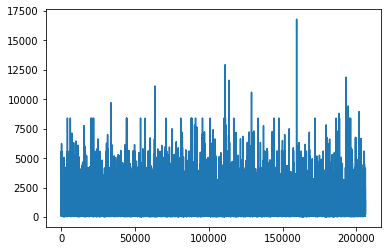

In [32]:
plt.plot(final_order_price_nut_score.nut_rel_price_ratio_mean_per_customer)

# nut_score trend (Dont run !!!!!!!!!!)

In [ ]:

#---- to be appended to "final_order_price_nut_score" from above

nut_score_trend_mean = df_base.groupby(['user_id','order_number']).agg({'nut_score':'mean'}).reset_index()
nut_score_trend_mean_by_user = nut_score_trend_mean.groupby(['user_id']).agg({'nut_score':'mean'}).reset_index()
nut_score_trend_mean_merge = pd.merge(nut_score_trend_mean,
                                      nut_score_trend_mean_by_user,  
                                      on ='user_id',
                                      how ='left') 

nut_score_trend_mean_merge.rename(columns={"nut_score_x":"nut_score_trend_mean_by_basket", "nut_score_y":"nut_score_trend_mean_by_user"},inplace = True)

nut_score_trend_mean_merge["nut_score_trend_moving_ave"] = nut_score_trend_mean_merge.groupby(["user_id"])['nut_score_trend_mean_by_basket'].cumsum()/nut_score_trend_mean_merge.order_number

#### IMPORTANT TO HAVE THIS ####
unique_user_list = list(set(df_base.user_id))

# df in the def here is table "nut_score_trend_mean_merge", using the moving average created 
# df  = nut_score_trend_mean_merge
# col = nut_score_trend_mean_by_basket 

def get_Q1_score(df):
    Q1_scr_list = []
    for i in tqdm(unique_user_list):
        user_table = df[df.user_id == i]
        boundary   = round(user_table.shape[0]/4)
        if boundary == 0:
            Q1_score = user_table.groupby('user_id').head(1).nut_score_trend_mean_by_basket.mean()
            Q1_scr_list.append(Q1_score)
        else: 
            Q1_score   = user_table.groupby('user_id').head(boundary).nut_score_trend_mean_by_basket.mean()
            Q1_scr_list.append(Q1_score)
    return Q1_scr_list

def get_Q2_score(df):
    Q2_scr_list = []
    for i in tqdm(unique_user_list):
        user_table = df[df.user_id == i]
        first_boundary   = round(user_table.shape[0]/2)
        second_boundary  = round(first_boundary/2)
        if first_boundary <= 1:
            Q2_score   = user_table.groupby('user_id').head(1).nut_score_trend_mean_by_basket.mean()
            Q2_scr_list.append(Q2_score)
        else:
            Q2_score   = user_table.groupby('user_id').head(first_boundary).tail(second_boundary).nut_score_trend_mean_by_basket.mean()
            Q2_scr_list.append(Q2_score)
    return Q2_scr_list

def get_Q3_score(df):
    Q3_scr_list = []
    for i in tqdm(unique_user_list):
        user_table = df[df.user_id == i]
        first_boundary   = round(user_table.shape[0]/2)
        second_boundary  = round(first_boundary/2)
        if first_boundary <= 1:
            Q3_score   = user_table.groupby('user_id').head(1).nut_score_trend_mean_by_basket.mean()
            Q3_scr_list.append(Q3_score)
        else:
            Q3_score   = user_table.groupby('user_id').tail(first_boundary).head(second_boundary).nut_score_trend_mean_by_basket.mean()
            Q3_scr_list.append(Q3_score)
    return Q3_scr_list

def get_Q4_score(df):
    Q4_scr_list = []
    for i in tqdm(unique_user_list):
        user_table = df[df.user_id == i]
        boundary   = round(user_table.shape[0]/4)
        if boundary == 0:
            Q4_score   = user_table.groupby('user_id').head(1).nut_score_trend_mean_by_basket.mean()
            Q4_scr_list.append(Q4_score)
        else:
            Q4_score   = user_table.groupby('user_id').tail(boundary).nut_score_trend_mean_by_basket.mean()
            Q4_scr_list.append(Q4_score)
    return Q4_scr_list

Q1_scr_list = get_Q1_score(nut_score_trend_mean_merge)
Q2_scr_list = get_Q2_score(nut_score_trend_mean_merge)
Q3_scr_list = get_Q3_score(nut_score_trend_mean_merge)
Q4_scr_list = get_Q4_score(nut_score_trend_mean_merge)

print(len(Q1_scr_list))
print(len(Q2_scr_list))
print(len(Q3_scr_list))
print(len(Q4_scr_list))

d = {'Q1_scr_list':Q1_scr_list,'Q2_scr_list':Q2_scr_list, 'Q3_scr_list':Q3_scr_list, 'Q4_scr_list':Q4_scr_list}
final_nut_score_trend = pd.DataFrame(d)

final_fix = pd.concat([final_order_price_nut_score,final_nut_score_trend], axis = 1)

#final_fix.to_csv("df_base_final_fix_Sept_20.csv")

#final_fix = pd.read_csv("C:/Users/wanyi/Desktop/Research Design/Clustering/df_base_final_fix_Sept_20.csv")

#  Addressing Reshma's Whatsapp comments on the aggregation

In [33]:
final_fix = copy.deepcopy(final_order_price_nut_score)

1041373.8025330602
879294.6781643355


Text(0.5, 1.0, 'hour_of_the_day')

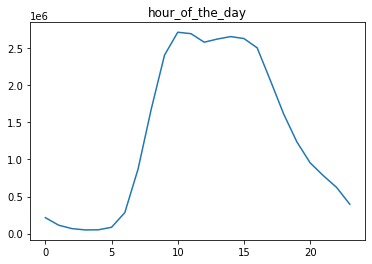

In [34]:
# checking whether any days_of_week or dow or hours_of_the_days are zero value in the columns. 

hour_of_the_day_col = [] 
for i in range(24):
    hours = "order_hour_of_day_" + str(i)
    hour_of_the_day_col.append(hours)

order_dow_col = [] 
for i in range(7):
    days_dow = "order_dow_" + str(i)
    order_dow_col.append(days_dow)
    
sum_hour_of_the_day_col = []
for i in hour_of_the_day_col:
    hr_col_sum = final_fix.loc[:,i].sum()
    sum_hour_of_the_day_col.append(hr_col_sum)
    
sum_dow_col = []
for i in order_dow_col:
    dow_col_sum = final_fix.loc[:,i].sum()    
    sum_dow_col.append(dow_col_sum)
    
#Result shows that none of columns are zero values. 

print(np.std(sum_hour_of_the_day_col))
print(np.std(sum_dow_col))

plt.plot(sum_hour_of_the_day_col)
plt.title("hour_of_the_day")

Text(0.5, 1.0, 'day_of_week')

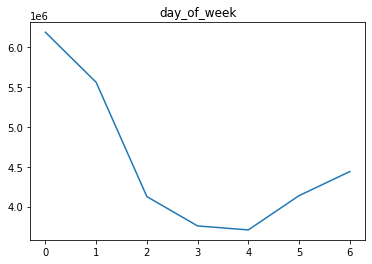

In [35]:
plt.plot(sum_dow_col)
plt.title("day_of_week")

In [36]:
# normalizing department features (frequency/ # of trips )
department_list = list(set(insta.department))
department_dum_col = [] 
for i in tqdm(department_list):
    department_name = "department_" + i
    department_dum_col.append(department_name)
    
#for i in tqdm(department_dum_col):
    #final_fix.loc[:,i] = final_fix.loc[:,i]/final_fix.order_number

# adding (# of total items bought in all trip)
final_fix["total_number_of_items_bought"] = final_fix.loc[:,department_dum_col].sum(axis = 1)

# adding (# of unique items bought in all trip)
#final_fix["number_of_unqiue_items_bought"] = insta.groupby('user_id').agg({"product_name":"nunique"}).reset_index()
final_fix["number_of_unqiue_items_bought"] = insta.groupby('user_id').agg({"product_name":"nunique"}).reset_index().product_name

# adding (% of repetition = #unique in all trip/%of total items in all trip)
final_fix["%_of_repetition"] = final_fix["number_of_unqiue_items_bought"]/final_fix["total_number_of_items_bought"]

# normalizing aisle features (frequency/ # of trips )
aisle_list = list(set(insta.aisle))
aisle_dum_col = [] 
for i in tqdm(aisle_list) :
    aisle_name = "aisle_" + i
    aisle_dum_col.append(aisle_name)
    
#for i in tqdm(aisle_dum_col):
    #final_fix.loc[:,i] = final_fix.loc[:,i]/final_fix.order_number

100%|███████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 98983.57it/s]


In [37]:
final = copy.deepcopy(final_fix)

In [38]:
pd.set_option('display.max_rows', 200)
final.isnull().any()


user_id                                  False
days_since_prior_order                   False
days_since_prior_order_median            False
order_number                             False
nut_rel_price_ratio                      False
order_dow_0                              False
order_dow_1                              False
order_dow_2                              False
order_dow_3                              False
order_dow_4                              False
order_dow_5                              False
order_dow_6                              False
order_hour_of_day_0                      False
order_hour_of_day_1                      False
order_hour_of_day_2                      False
order_hour_of_day_3                      False
order_hour_of_day_4                      False
order_hour_of_day_5                      False
order_hour_of_day_6                      False
order_hour_of_day_7                      False
order_hour_of_day_8                      False
order_hour_of

In [39]:
final.nut_rel_price_ratio_mean_per_customer.fillna(0, inplace = True) # there are 6 items in total with 0 so overwirte this

In [40]:
final.to_csv("Cust_agg_without_trend_Oct_7.csv")

In [41]:
final[final.user_id == 206123]

,user_id,days_since_prior_order,days_since_prior_order_median,order_number,nut_rel_price_ratio,order_dow_0,order_dow_1,order_dow_2,order_dow_3,order_dow_4,...,order_max_min,rel_price_basket_sum,rel_price_basket_mean,nut_score_basket_median,nut_score_basket_mean,nut_score_above_5,nut_rel_price_ratio_mean_per_customer,total_number_of_items_bought,number_of_unqiue_items_bought,%_of_repetition
206007,206123,11.204778,9.0,29,inf,0.0,60.0,27.0,72.0,61.0,...,2,19.901282,0.686251,5.375,5.289241,182,564.641751,293.0,139,0.474403


In [42]:
sorted(set(final.user_id))[-1]

206209

In [43]:
len(sorted(set(final.user_id)))

206094

# No need to run everything below !!!!!!!!!!!!!!!

# Adding of trend of nut_score (Don't run)

In [ ]:
nut_score_trend = final[["Q1_scr_list","Q2_scr_list","Q3_scr_list","Q4_scr_list"]]

def func(row):
    if row['Q4_Q3_diff'] >= row['Q3_Q2_diff']:
        if row['Q3_Q2_diff'] > row['Q2_Q1_diff']:
            val = "up"
        else:
            val = "fixed"
    else: #row['Q4_Q3_diff'] <= row['Q3_Q2_diff']
        if  row["Q3_Q2_diff"] < row["Q2_Q1_diff"]:
            val = "down"
        else:
            val = "fixed"
    return val

nut_score_trend["Q1_Q2_average"] = (nut_score_trend["Q1_scr_list"] + nut_score_trend["Q2_scr_list"])/2
nut_score_trend["Q3_Q4_average"] = (nut_score_trend["Q3_scr_list"] + nut_score_trend["Q4_scr_list"])/2
nut_score_trend["increasing_trend_average"] =  nut_score_trend.Q3_Q4_average > nut_score_trend.Q1_Q2_average
nut_score_trend["Q2_Q1_diff"]    = nut_score_trend["Q2_scr_list"] - nut_score_trend["Q1_scr_list"]
nut_score_trend["Q3_Q2_diff"]    = nut_score_trend["Q3_scr_list"] - nut_score_trend["Q2_scr_list"]
nut_score_trend["Q4_Q3_diff"]    = nut_score_trend["Q4_scr_list"] - nut_score_trend["Q3_scr_list"]
nut_score_trend["Q4_Q1_diff"]    = nut_score_trend["Q4_scr_list"] - nut_score_trend["Q1_scr_list"]
nut_score_trend["increase_trend_diff"] = nut_score_trend["Q4_scr_list"] - nut_score_trend["Q1_scr_list"]
nut_score_trend["nut_score_trend_Q1_Q2_Q3_Q4"]  =  nut_score_trend.apply(func, axis = 1)

nut_score_trend

nut_score_trend.nut_score_trend_Q1_Q2_Q3_Q4.value_counts()

nut_score_trend_result = nut_score_trend.iloc[:,4:]

final_with_nut_score_trend = pd.concat([final,nut_score_trend_result], axis = 1)

final_with_nut_score_trend["nut_score_above_5_percent"] = final_with_nut_score_trend["nut_score_above_5"]/final_with_nut_score_trend["total_number_of_items_bought"]

# Below is to calculate the relative price for each aisle and to replace the original price. 
### 1) This rel_price has been applied to price above so no need to run code below again!
### 2) relative price for product (based on Aisle - most granular level)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
df_rel_price = df_base[["user_id","food_id","aisle","type","price"]].copy()
df_rel_price = df_rel_price.drop_duplicates(subset=['food_id'], keep='last')
df_rel_price.shape

In [ ]:
# SS is not suitable as will provide negative number. Negative price is ok within a single aisle.
# Issue rises when we combined negative across all other aisle. So we will pick MMS
#SS = StandardScaler().fit(testing_df[["food_id","price"]])
#SS_testing_price  = SS.transform(testing_df[["food_id","price"]])

uniq_aisle_list = list(set(df_rel_price.aisle))
print("number of aisle:",len(uniq_aisle_list))


rel_price = pd.DataFrame()
for i in tqdm(uniq_aisle_list):
    df = df_rel_price[df_rel_price.aisle == i]
    MMS = MinMaxScaler().fit(df[["food_id","price"]])
    MMS_testing_price = MMS.transform(df[["food_id","price"]])
    df.loc[:,"rel_price"] = MMS_testing_price[:,1]
    rel_price = pd.concat([rel_price,df])
    
    

In [ ]:
rel_price = rel_price.sort_values("food_id")[["food_id","rel_price"]]

In [ ]:
nut_consol_df  = pd.read_csv("C:/Users/wanyi/Desktop/Research Design/Data/Nutrition data/Nutrition Data Consolidated (James)_Aug_15_with_type_scores_price.csv")

In [ ]:
df_consol = pd.merge(nut_consol_df,
                    rel_price,
                    on  = "food_id",
                    how = 'left')

In [ ]:
df_consol.to_csv("C:/Users/wanyi/Desktop/Research Design/Data/Nutrition data/Nutrition Data Consolidated (James)_Sept_12_with_type_scores_price.csv")

## Adding features of nutrition score/ price for each item

In [ ]:
df_consol = pd.read_csv("C:/Users/wanyi/Desktop/Research Design/Data/Nutrition data/Nutrition Data Consolidated (James)_Sept_12_with_type_scores_price.csv")

In [ ]:
df_consol['nut_price_ratio'] = (df_consol.SAIN_LIM_Point+1)/df_consol.price
df_consol['nut_rel_price_ratio'] = (df_consol.SAIN_LIM_Point+1)/df_consol.rel_price

## this saved file has been updated and used correctly from above no need to run again!!!!

In [ ]:
df_consol.to_csv("C:/Users/wanyi/Desktop/Research Design/Data/Nutrition data/Nutrition Data Consolidated (James)_Sept_22_with_type_scores_price.csv")

# Examine regression between price and nutrition score

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
df_consol = pd.read_csv("C:/Users/wanyi/Desktop/Research Design/Data/Nutrition data/Nutrition Data Consolidated (James)_Sept_12_with_type_scores_price.csv", index_col = 0)

In [ ]:
df_regression = df_consol[df_consol.Source == "Nutritionix"][["rel_price","SAIN_LIM_Point"]]
x = df_regression.SAIN_LIM_Point
y = df_regression.rel_price

In [ ]:
plt.plot(x,y)

In [ ]:
from scipy.stats import linregress
linregress(x,y)

# End of this notebook! Below is just checking

### Visualization 

In [ ]:
nut_score_trend_T = nut_score_trend.T.iloc[1:5,80:100]

In [ ]:
nut_score_trend_T

In [ ]:
nut_score_trend_T.plot()


# Price EDA 

In [ ]:
df_price = pd.read_csv("C:/Users/wanyi/Desktop/Research Design/Clustering/Cust_agg_with_nut_score_trend_Aug_31.csv")

In [ ]:
df_price.head(3)

In [ ]:
price_eda_col = ['user_id','days_since_prior_order','days_since_prior_order_median','order_number','order_max_mean',
 'order_max_max','order_max_min','price_basket_sum','price_basket_median','nut_score_basket_median','Q1_scr_list','Q2_scr_list',
 'Q3_scr_list','Q4_scr_list','total_number_of_items_bought','number_of_unqiue_items_bought','%_of_repetition']

In [ ]:
df_eda = df_price.loc[:,price_eda_col]
df_eda.head()

In [ ]:
df_eda.price_basket_sum.plot.hist(bins = 200, alpha =0.5)

In [ ]:
df_eda.price_basket_sum.plot.box()

In [ ]:
df_eda.price_basket_median.plot.hist(bins = 200, alpha =0.5)

In [ ]:
df_eda.price_basket_median.plot.box()

# To identify the less frequent buyer ( which have 2 or less records of order) - For Q1,Q2,Q3 and Q4

In [ ]:
odd = pd.read_csv("C:/Users/wanyi/Desktop/Research Design/Clustering/odd.csv")
odd_list = odd.james.tolist()
c = nut_score_trend_mean_merge[nut_score_trend_mean_merge.user_id.isin(odd_list)] 

def get_Q1_score_odd(df):
    Q1_scr_list = []
    for i in tqdm(odd_list):
        user_table = df[df.user_id == i]
        boundary   = round(user_table.shape[0]/4)
        Q1_score   = user_table.groupby('user_id').head(boundary).nut_score_trend_mean_by_basket.mean()
        Q1_scr_list.append(Q1_score)
    return Q1_scr_list

nut_score_trend_mean_merge[nut_score_trend_mean_merge.user_id == 202652]

In [ ]:
Q1_scr_list = []
for i in tqdm(odd_list):
    user_table = nut_score_trend_mean_merge[nut_score_trend_mean_merge.user_id == i]
    boundary   = round(user_table.shape[0]/4)
    if boundary == 0:
        Q1_score = user_table.groupby('user_id').head(1).nut_score_trend_mean_by_basket.mean()
        Q1_scr_list.append(Q1_score)
    else: 
        Q1_score   = user_table.groupby('user_id').head(boundary).nut_score_trend_mean_by_basket.mean()
        Q1_scr_list.append(Q1_score)

In [ ]:
sum(Q1_scr_list)

# To identify the less frequent buyer ( which have 2 or less records of order) - For Q2 and Q3 after the previous step that fixed Q1,Q2,Q3 and Q4.

In [ ]:
q2_q3_nan = pd.read_csv("C:/Users/wanyi/Desktop/Research Design/Clustering/Q2_Q3_NAN.csv")
q2_q3_nan_list = q2_q3_nan.user_id.tolist()
pd.set_option('display.max_rows', 2000)

In [ ]:
nut_score_trend_mean_merge[nut_score_trend_mean_merge.user_id == 87]

In [ ]:
round(0.5)

In [ ]:
round(1.5)